# Análise de Qualidade de Vinhos  Usando Técnicas de Ciência de Dados e Aprendizado de Máquina

Neste projeto, exploramos a aplicação de técnicas avançadas de ciência de dados e aprendizado de máquina para compreender e prever a qualidade de vinhos com base em características físico-químicas.

In [37]:
#importando as bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o conjunto de dados
data = pd.read_csv('winequality-red.csv')

# visualisando as primeiras linhas do conjunto de dados
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


A partir do gráfico de barras, podemos observar que as qualidades de vinho mais comuns no conjunto de dados são 5, 6 e 7. Essas são as categorias predominantes, enquanto as qualidades extremas (mais baixas) são menos frequentes.

Essa visualização nos dará uma ideia de como as diferentes qualidades de vinho estão distribuídas no conjunto de dados.

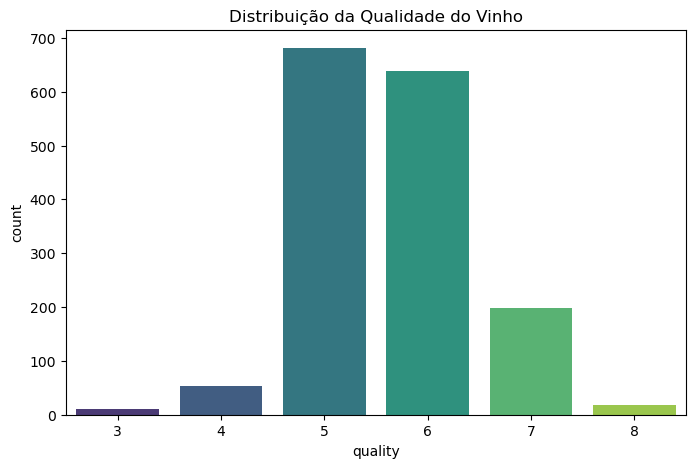

In [38]:
# visualizando a distribuição da qualidade do vinho
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribuição da Qualidade do Vinho')
plt.show()

Agora, vamos explorar a relação entre algumas variáveis específicas e a qualidade do vinho. Neste exemplo, vamos olhar para a relação entre o teor alcoólico (alcohol) e a qualidade do vinho.

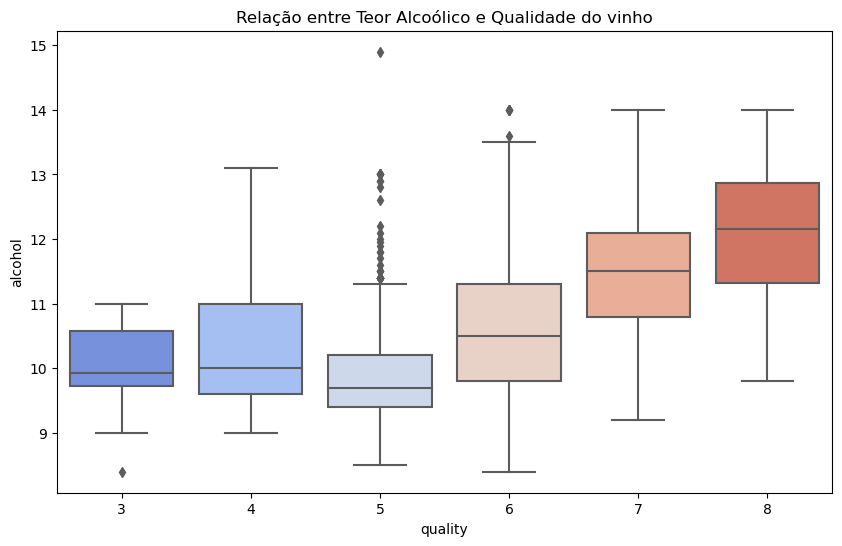

In [39]:
# Relação entre teor alcoólico e qualidade do vinho
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=data, palette='coolwarm')
plt.title('Relação entre Teor Alcoólico e Qualidade do vinho')
plt.show()

A presença de outliers em diferentes categorias de qualidade indica que há variação significativa nos dados. No caso da qualidade 5, que tem uma concentração maior de outliers, isso sugere uma maior dispersão nos níveis de teor alcoólico para vinhos dessa qualidade.

Vamos criar uma matriz de correlação para entender como as características estão inter-relacionadas.

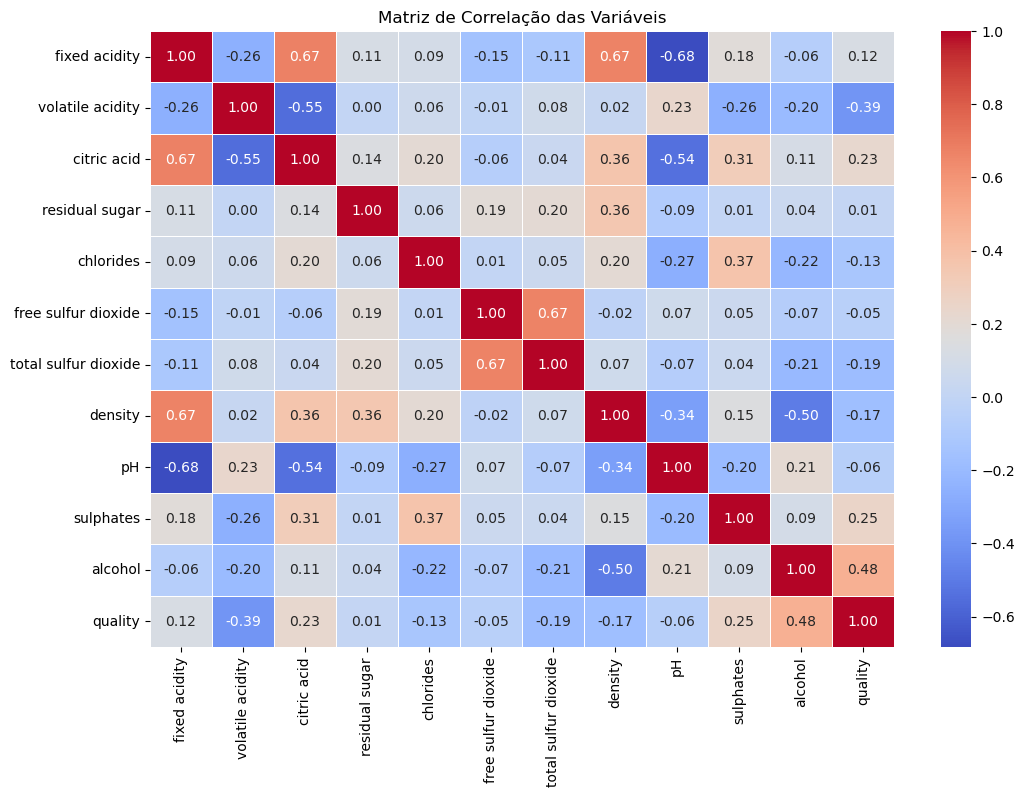

In [40]:
# Matriz de Correlação
correlacao_matriz = data.corr()

# Plotando a Matriz de Correlação usando um mapa de calor (heatmap)
plt.figure(figsize=(12,8))
sns.heatmap(correlacao_matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# Modelo de Regressão Linear

Vamos realizar uma análise de regressão simples. Neste exemplo, vou considerar a variável 'alcohol' como a variável independente e 'quality' como a variável dependente. Vamos ver como o teor alcoólico pode influenciar a qualidade do vinho.

In [41]:
# importando a biblioteca Statsmodels
import statsmodels.api as sm

# Adicionando uma constante para a regressão
data['const'] = 1

# Variável independentes e dependente
X = data[['const', 'alcohol']]
y = data['quality']

# Ajustando o modelo de regressão
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           2.83e-91
Time:                        15:45:20   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.0

Vamos criar um gráfico de dispersão com a linha de regressão sobreposta para visualizar a relação entre o teor alcoólico e a qualidade do vinho. 

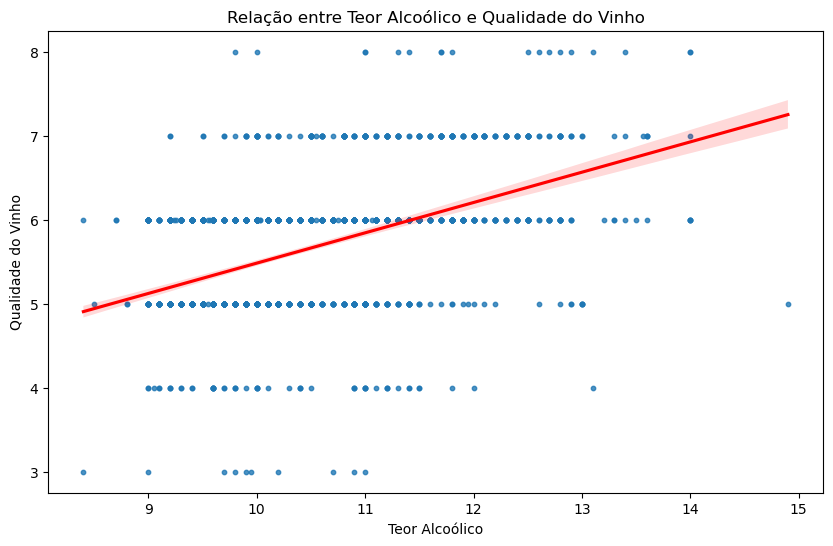

In [42]:
# Criando um gráfico de dispersão com a linha de regressão.
plt.figure(figsize=(10, 6))
sns.regplot(x='alcohol', y='quality', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Relação entre Teor Alcoólico e Qualidade do Vinho')
plt.xlabel('Teor Alcoólico')
plt.ylabel('Qualidade do Vinho')
plt.show()

Na análise de regressão realizada, observamos uma relação positiva entre o teor alcoólico e a qualidade do vinho. O coeficiente associado à variável 'alcohol' é positivo (0.3196), indicando que, em média, um aumento no teor alcoólico está associado a um aumento na qualidade do vinho.

Ao visualizar o gráfico de dispersão com a linha de regressão, notamos um padrão crescente nas categorias 5, 6 e 7 de qualidade em relação ao teor alcoólico. Isso sugere que, dentro dessas categorias, vinhos com teor alcoólico mais alto têm, em média, uma qualidade mais alta.

É importante lembrar que a correlação identificada não implica causalidade, e outras variáveis não incluídas podem influenciar a relação observada.


Expansão do modelo de regressão para incluir mais variáveis independentes. Vamos adicionar algumas variáveis e ajustar o modelo.

In [43]:
# Adicionando mais variáveis independentes
X = data[['const', 'alcohol', 'citric acid', 'fixed acidity', 'pH', 'density']]
y = data['quality']


# Ajustando o modelo de regressão múltipla
modelo_multiplo = sm.OLS(y, X).fit()

# Resumo do novo modelo
print(modelo_multiplo.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     114.3
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          2.02e-103
Time:                        15:45:21   Log-Likelihood:                -1681.5
No. Observations:                1599   AIC:                             3375.
Df Residuals:                    1593   BIC:                             3407.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            34.0411     17.284      1.970

Com base nos resultados apresentados, podemos observar as variáveis que têm uma relação aparentemente mais forte com a qualidade do vinho. 

Alcohol: O teor alcoólico tem uma forte relação positiva e estatisticamente significativa com a qualidade do vinho. Aumentos no teor alcoólico estão associados a aumentos significativos na qualidade.

Citric Acid: A presença de ácido cítrico também tem uma relação positiva e estatisticamente significativa com a qualidade do vinho. Maior quantidade de ácido cítrico está associada a uma maior qualidade.

Fixed Acidity: Embora o valor-p não seja extremamente baixo, a acidez fixa mostra uma tendência positiva em relação à qualidade. Vale a pena considerar a contribuição dela, mesmo que o resultado não seja estatisticamente significativo em todos os níveis de confiança.

# validação cruzada

Realizando validação cruzada para avaliar desempenho do modelo e garantir que ele seja capaz de generalizar bem para novos dados.

In [44]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv('winequality-red.csv')

X = df.drop('quality', axis=1)
y = df['quality']

# Criando modelo de regressão Linear
model_lr = LinearRegression()

# Validação cruzada usando R² como métrica de desempenho
scores = cross_val_score(model_lr, X, y, cv=5, scoring='r2')

# Resultados
print('R² médio: {:.2f}'.format(np.mean(scores)))


R² médio: 0.29


O R² médio de 0.29 sugere que o modelo atual explica cerca de 29% da variação na qualidade do vinho nos dados de validação cruzada. Em muitos casos, busca-se um valor de R² mais próximo de 1 para indicar um modelo que explica uma porcentagem maior da variação.

regressão polinomial

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X = df.drop('quality', axis=1)
y = df['quality']

# Experimentando com diferentes graus polinomiais
grau_polinomial = 2 


# Criando um modelo de regressão polinomial
modelo = make_pipeline(PolynomialFeatures(grau_polinomial), LinearRegression())

# Validação cruzada usrando o R² como métrica de desmpenho
scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')

# Resultados
print('R² médio: {:.2f}'.format(np.mean(scores)))

R² médio: 0.23


In [46]:
for grau_polinomial in range(1, 5):
    modelo = make_pipeline(PolynomialFeatures(grau_polinomial), LinearRegression())
    scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
    print('R² médio (Grau {}): {:.2f}'.format(grau_polinomial, np.mean(scores)))

R² médio (Grau 1): 0.29
R² médio (Grau 2): 0.23
R² médio (Grau 3): -7.51
R² médio (Grau 4): -872222.11



Os resultados da experimentação com diferentes graus polinomiais indicam que, até o momento, a regressão polinomial não está melhorando o desempenho do modelo. Na verdade, os resultados parecem piorar à medida que aumentamos o grau do polinômio.
temos um problema de overfitting.

# Regularização

Tentando uma abordagem com regularização para ver se ela melhora o desempenho do modelo e ajuda a evitar overfitting. 

In [47]:
from sklearn.linear_model import Ridge

# Diferentes valores de alpha para controlar a força da regularização
valores_alpha = [0.1, 1, 10, 100]


for alpha in valores_alpha:
    modelo_ridge = Ridge(alpha=alpha)
    scores_ridge = cross_val_score(modelo_ridge, X, y, cv=5, scoring='r2')
    print('R² médio (Ridge, alpha={}: {:.2f})'.format(alpha, np.mean(scores_ridge)))

R² médio (Ridge, alpha=0.1: 0.29)
R² médio (Ridge, alpha=1: 0.29)
R² médio (Ridge, alpha=10: 0.29)
R² médio (Ridge, alpha=100: 0.25)


Os resultados com a regularização Ridge indicam que, até o momento, a introdução da penalidade L2 (Ridge) não está levando a melhorias significativas no desempenho do modelo.

# Regressão Lasso

In [48]:
from sklearn.linear_model import Lasso

# Diferentes valores de alpha para controlar a força da regularização
for alpha in valores_alpha:
    modelo_lasso = Lasso(alpha=alpha)
    scores_lasso = cross_val_score(modelo_lasso, X, y, cv=5, scoring='r2')
    print('R² médio (Lasso, alpha={}): {:.2f}'.format(alpha, np.mean(scores_lasso)))

R² médio (Lasso, alpha=0.1): 0.18
R² médio (Lasso, alpha=1): -0.04
R² médio (Lasso, alpha=10): -0.08
R² médio (Lasso, alpha=100): -0.08


# Modelos de Ensemble

In [49]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Exemplo com Random Forest Regressor
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores_rf = cross_val_score(modelo_rf, X, y, cv=5, scoring='r2')
print('R² médio (Random Forest): {:.2f}'.format(np.mean(scores_rf)))


R² médio (Random Forest): 0.31


Os resultados indicam algumas melhorias, especialmente ao usar o modelo de ensemble Random Forest. No entanto, os resultados com Lasso parecem piorar o desempenho em relação à regressão linear simples.

Explorando um pouco mais o desempenho do modelo Random Forest.

# Random Forest com Ajuste de Hiperparâmetros

In [51]:
from sklearn.model_selection import GridSearchCV

# Hiperparâmetros para pesquisa
parametros_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Modelo Random Forest
modelo_rf = RandomForestRegressor(random_state=42)

# Pesquisa em grade para encontrar os melhores hiperparâmetros
grid_rf = GridSearchCV(modelo_rf, parametros_rf, cv=5, scoring='r2')
grid_rf.fit(X, y)

# Melhores hiperparâmetros e o R² médio correspondente
print('Melhores Hiperparâmetros:', grid_rf.best_params_)
print('R² médio (Random Forest otimizado): {:.2f}'.format(grid_rf.best_score_))


Melhores Hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
R² médio (Random Forest otimizado): 0.32


In [52]:
# os melhores hiperparâmetros e o R² médio correspondente
print('Melhores Hiperparâmetros:', grid_rf.best_params_)
print('R² médio (Random Forest otimizado): {:.2f}'.format(grid_rf.best_score_))

# Treinando o modelo Random Forest otimizado
modelo_rf_otimizado = grid_rf.best_estimator_
modelo_rf_otimizado.fit(X, y)

# Exibindo a importância de cada variável
importancias_variaveis_rf = modelo_rf_otimizado.feature_importances_
importancias_df_rf = pd.DataFrame({'Variável': X.columns, 'Importância': importancias_variaveis_rf})
importancias_df_rf = importancias_df_rf.sort_values(by='Importância', ascending=False)
print(importancias_df_rf)


Melhores Hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
R² médio (Random Forest otimizado): 0.32
                Variável  Importância
10               alcohol     0.315267
9              sulphates     0.149340
1       volatile acidity     0.129398
6   total sulfur dioxide     0.074748
4              chlorides     0.056482
8                     pH     0.052585
3         residual sugar     0.047305
0          fixed acidity     0.046327
7                density     0.045938
2            citric acid     0.041659
5    free sulfur dioxide     0.040950


A análise da importância das variáveis é valiosa para entender quais características estão contribuindo mais para a qualidade do vinho. No seu conjunto de dados, parece que a variável "alcohol" é a mais importante, seguida por "sulphates" e "volatile acidity".

# Dividindo o conjunto de dados original em conjutos de treinamento e teste.

In [53]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# X_treino e y_treino são os conjuntos de treinamento
# X_teste e y_teste são os conjuntos de teste


# Treinando o Modelo 

In [54]:
# Treino do modelo no conjunto de treinamento
modelo_otimizado = grid_rf.best_estimator_
modelo_otimizado.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [56]:
# Previsões no conjuto de teste
previsoes_teste = modelo_otimizado.predict(X_teste)
previsoes_teste

array([5.31279507, 5.08077178, 5.47469182, 5.20497929, 5.93612048,
       5.10716757, 5.15511615, 4.96950838, 6.12296293, 5.93893646,
       6.69438292, 5.28103727, 5.65247068, 5.23060562, 5.47710708,
       6.36240043, 5.32962317, 5.72860088, 6.84538587, 5.13103464,
       4.92198988, 5.65455136, 5.36494363, 5.92284593, 5.53965007,
       5.85443883, 6.37474222, 5.29666693, 5.25243728, 5.98174453,
       5.33294184, 5.36176055, 5.80974325, 5.36359497, 5.6759493 ,
       5.10228544, 6.19804809, 6.013055  , 5.43592734, 6.05611404,
       5.24367774, 5.19235186, 6.31276515, 5.11293012, 5.56991095,
       5.71038985, 6.34003029, 5.62374519, 5.24437421, 5.67444703,
       5.02225671, 5.26681901, 5.58631548, 7.02170897, 5.23915443,
       5.58105635, 5.97000333, 5.89710422, 5.55399891, 5.11789354,
       5.71115113, 6.27725511, 5.33548304, 5.24246889, 6.81286495,
       5.20759257, 6.7265259 , 5.5022118 , 6.66478902, 5.36371941,
       6.08944689, 5.18985636, 5.76127552, 5.66627718, 6.06849

# Avaliando o desempenho usando métricas de avaliação


In [59]:
from sklearn.metrics import r2_score, mean_squared_error


In [61]:
r2_teste = r2_score(y_teste, previsoes_teste)
mse_teste = mean_squared_error(y_teste, previsoes_teste)

print('R² no Conjunto de Teste:', r2_teste)
print('MSE no Conjunto de Teste:', mse_teste)

R² no Conjunto de Teste: 0.5113978079455191
MSE no Conjunto de Teste: 0.3193043954110723


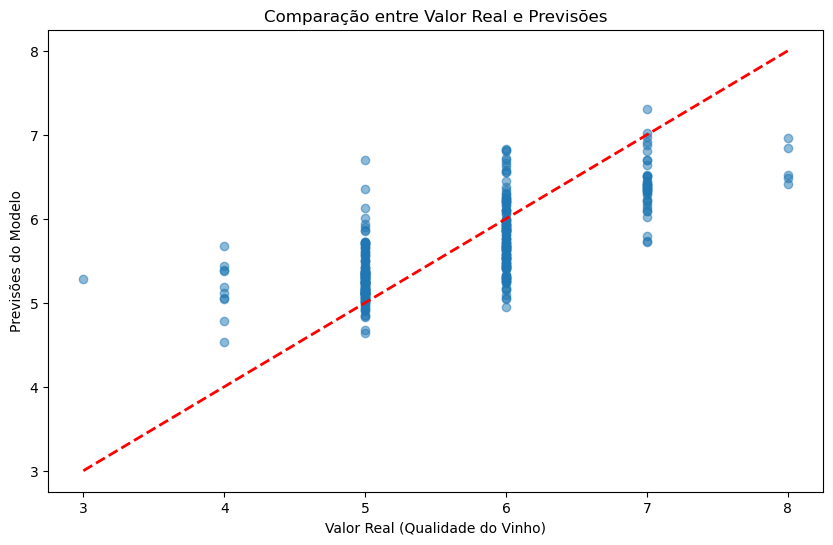

In [68]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(y_teste, previsoes_teste, alpha=0.5)
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], color='red', linestyle='--', linewidth=2)
plt.title('Comparação entre Valor Real e Previsões')
plt.xlabel('Valor Real (Qualidade do Vinho)')
plt.ylabel('Previsões do Modelo')
plt.show()


Neste gráfico de dispersão, cada ponto representa uma amostra no conjunto de teste. O eixo x mostra a qualidade real do vinho, enquanto o eixo y mostra as previsões do modelo. A linha vermelha representa uma relação ideal onde os pontos deveriam estar se as previsões fossem perfeitas.

# Conclusão Final:
Considerando os resultados obtidos até agora, o Random Forest Regressor otimizado parece ser uma escolha sólida para prever a qualidade do vinho neste conjunto de dados.